# Global sensitivity analysis using the Sobol method

In [2]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
from SALib.analyze import sobol
import plot
import matplotlib.pyplot as plt

Read in the data and create the output variables

In [3]:
# Read the data
data = pd.read_csv('../Data/batchrun02-02-2018.csv')

# Create output variables
data['total'] = np.round(data['N'] // 2) + np.round((data['N'] // 2) * data['ratio']) + data['N'] - np.round(data['N'] // 2) - np.round(
    (data['N'] // 2) * data['ratio'])
data['pfl_net'] = (data['pheromone'] - data['followers'] - data['leaders']) / data['total']
data['pu_net'] = (data['pheromone'] - data['unassigned']) / data['total']
data['flu_net'] = (data['followers'] + data['leaders'] - data['unassigned']) / data['total']
params = ['p_uf', 'p_pu', 'p_up', 'p_fl', 'p_lu', 'g', 'ratio', 'N', 'size']

Compute the first order, second order, and total order sensitivity indices using the Sobol method. By changing the 'output' variable different output variables can be tested. The naming scheme is:

- 'pfl_net' : (pheromoners - followers - leaders)/total
- 'pu_net' : (pheromoners - unassigned)/total
- 'flu_net' : (followers + leaders - unassigned)/total

In [4]:
problem = {
    'num_vars': 9,
    'names': params,
    'bounds': [[0, 1]] * 5 + [[0, 0.5]] + [[0, 1]] + [[10, 200]] + [[3, 20]]
}
output = 'flu_net'
Si = sobol.analyze(problem, data[output].as_matrix(), print_to_console=True)

Parameter S1 S1_conf ST ST_conf
p_uf 0.015212 0.018382 0.127882 0.022635
p_pu 0.242635 0.044159 0.546968 0.036841
p_up 0.173367 0.036076 0.462923 0.032990
p_fl -0.009059 0.016999 0.079870 0.015573
p_lu 0.165721 0.054885 0.367186 0.042306
g -0.007970 0.016051 0.072020 0.017263
ratio -0.001634 0.017608 0.095910 0.016479
N 0.004315 0.015684 0.084518 0.015367
size 0.001146 0.013321 0.071850 0.014549

Parameter_1 Parameter_2 S2 S2_conf
p_uf p_pu -0.014133 0.025382
p_uf p_up 0.003332 0.029804
p_uf p_fl -0.012868 0.030081
p_uf p_lu 0.007029 0.030179
p_uf g -0.009666 0.028997
p_uf ratio -0.009600 0.030218
p_uf N -0.007412 0.029411
p_uf size -0.008593 0.027882
p_pu p_up 0.177383 0.046635
p_pu p_fl 0.030404 0.046352
p_pu p_lu 0.031571 0.045250
p_pu g 0.026743 0.047333
p_pu ratio 0.038281 0.047452
p_pu N 0.012353 0.047431
p_pu size 0.017676 0.046719
p_up p_fl 0.039492 0.046020
p_up p_lu 0.028964 0.046948
p_up g 0.030703 0.046959
p_up ratio 0.037398 0.046619
p_up N 0.037938 0.045098
p_up size 0.04

Plotting it gives more insight:

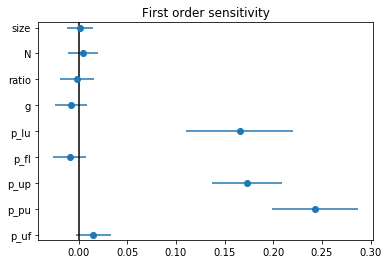

In [5]:
# First order
plot.plot_index(Si, params, '1', 'First order sensitivity')
plt.show()

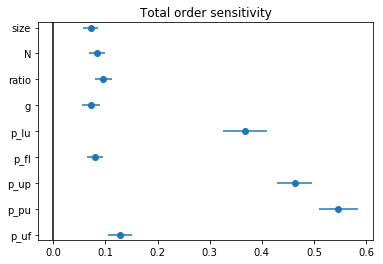

In [6]:
# Total order
plot.plot_index(Si, params, 'T', 'Total order sensitivity')
plt.show()